
# Ready

In [ ]:
# 한글 폰트 다운 -> 한글 깨짐 현상 해결 위함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#pip install geopandas

In [ ]:
#pip install wordcloud

런타임 다시 시작해야함!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import geopandas as gpd
from matplotlib.animation import FuncAnimation
from PIL import Image
import matplotlib.ticker as mticker
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


공유 문서함 → 공유 폴더 맨 오른쪽 ⋮ 표시 누르고 → 정리 - 바로가기 추가 → 내 드라이브

In [ ]:
path = ('/content/gdrive/MyDrive/6캔두잇/저출산/저출산 CSV/')

# 앞 부분

## 지도

In [ ]:
df = pd.read_csv(path+'시도별_출생아수_합계출산율_01to22.csv',encoding='cp949')
# 인덱스 1행부터의 값들을 int로 변환
df.iloc[1:] = df.iloc[1:].astype(float)
# 첫 번째 컬럼 이름을 '연도'로 변경
df.rename(columns={df.columns[0]: '연도'}, inplace=True)

In [ ]:
birth = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
                    '대전광역시','울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도',
                    '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
tfr = ['서울특별시.1', '부산광역시.1', '대구광역시.1', '인천광역시.1', '광주광역시.1',
                    '대전광역시.1','울산광역시.1', '세종특별자치시.1', '경기도.1', '강원도.1', '충청북도.1',
                    '충청남도.1', '전라북도.1', '전라남도.1', '경상북도.1', '경상남도.1', '제주특별자치도.1']
net_migration = ['서울특별시.2', '부산광역시.2', '대구광역시.2', '인천광역시.2', '광주광역시.2',
                    '대전광역시.2','울산광역시.2', '세종특별자치시.2', '경기도.2', '강원도.2', '충청북도.2',
                    '충청남도.2', '전라북도.2', '전라남도.2', '경상북도.2', '경상남도.2', '제주특별자치도.2']

#### 연도별 1인 순이동자수, 출생아수, lineplot

FileNotFoundError: ignored

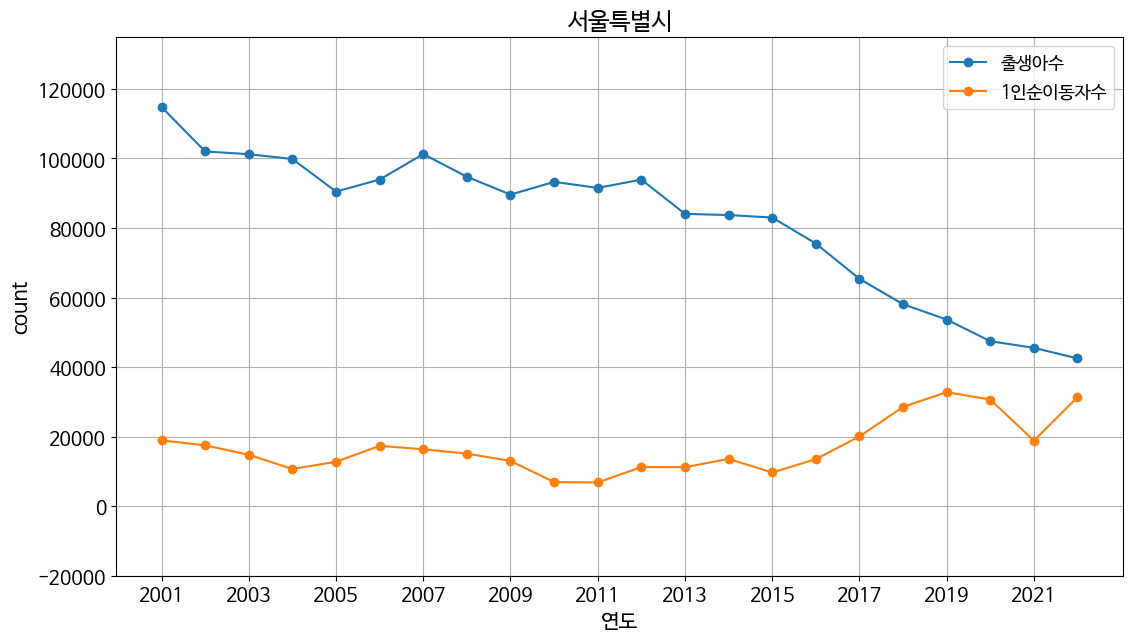

In [ ]:

def get_line(birth : str, net_migration : str) :
    plt.figure(figsize=(13, 7))
    plt.plot(range(2001, 2023), df[birth].iloc[1:], label='출생아수', marker='o')
    plt.plot(range(2001, 2023), df[net_migration].iloc[1:], label='1인순이동자수', marker='o')

    plt.ylim(-20000, 135000)
    plt.xlabel('연도',fontsize=15)
    plt.ylabel('count',fontsize=15)
    plt.title(birth,fontsize=17)
    plt.legend(fontsize=13)
    plt.xticks(range(2001, 2023,2),fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True)

    # 그래프를 이미지로 저장
    plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/'+f'{birth}_연도별_1인순이동자수_출생아수.png', dpi=400)

for i, j in zip(birth, net_migration):
    get_line(i, j)

#### 연도, 합계출산율, scatterplot

In [ ]:
df_removed_first_row = df.drop(0)

In [ ]:
# 데이터 타입 변환 (예: float64)
df_removed_first_row = df_removed_first_row.astype('float64')

def get_scatter(tfr : str) :
    plt.figure(figsize=(13,7))
    # Scatter plot 그리기 (hue를 사용하여 범례를 만들고 색상으로 구분)
    sns.scatterplot(x='연도', y=tfr, hue=tfr, data=df_removed_first_row)

    # 추세선 추가
    sns.regplot(x='연도', y=tfr, data=df_removed_first_row, scatter=False)

    # 그래프 제목 추가
    plt.title(tfr, fontsize=17)

    # ylim
    plt.ylim(0, 2.0)
    # x축과 y축 레이블 추가
    plt.ylabel('합계출산율', fontsize=15)
    plt.xlabel('연도', fontsize=15)

    # 파일명에서 '.1' 제거
    tfr_name = tfr.replace('.1', '')

    # 범례
    legend = plt.legend(fontsize=13)
    legend.set_title('합계출산율')

    # 파일명에서 '.1' 제거
    tfr_name = tfr.replace('.1', '')

    # 그래프를 이미지로 저장
    # plt.savefig(f'{tfr_name}_연도_합계출산율_scatter.png', dpi=400)
    plt.title(f'{tfr_name}')
    plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/'+f'{tfr_name}_연도_합계출산율_scatter.png', dpi=400)

for i in tfr :
    get_scatter(i)

In [ ]:
oecd_df = pd.read_csv('/content/drive/MyDrive/6캔두잇/저출산/저출산 CSV/oecd_young_population.csv')

In [ ]:
oecd_df=oecd_df[["LOCATION", "TIME", "Value"]]

oecd_2021_df = oecd_df[oecd_df["TIME"] == 2021]
oecd_2021_df.reset_index(drop = True, inplace = True)
oecd_2021_df

country_mapping = {
    'AUS': 'Australia',
    'AUT': 'Austria',
    'BEL': 'Belgium',
    'CAN': 'Canada',
    'CZE': 'Czech Republic',
    'DNK': 'Denmark',
    'FIN': 'Finland',
    'FRA': 'France',
    'DEU': 'Germany',
    'GRC': 'Greece',
    'HUN': 'Hungary',
    'ISL': 'Iceland',
    'IRL': 'Ireland',
    'ITA': 'Italy',
    'JPN': 'Japan',
    'KOR': 'South Korea',
    'LUX': 'Luxembourg',
    'MEX': 'Mexico',
    'NLD': 'Netherlands',
    'NZL': 'New Zealand',
    'NOR': 'Norway',
    'POL': 'Poland',
    'PRT': 'Portugal',
    'SVK': 'Slovakia',
    'ESP': 'Spain',
    'SWE': 'Sweden',
    'CHE': 'Switzerland',
    'TUR': 'Turkey',
    'GBR': 'United Kingdom',
    'USA': 'United States',
    'BRA': 'Brazil',
    'CHL': 'Chile',
    'COL': 'Colombia',
    'EST': 'Estonia',
    'ISR': 'Israel',
    'SVN': 'Slovenia',
    'EU27': 'European Union',
    'OECD': 'Organisation for Economic Co-operation and Development',
    'LVA': 'Latvia',
    'ARG': 'Argentina',
    'BGR': 'Bulgaria',
    'CHN': 'China',
    'CRI': 'Costa Rica',
    'HRV': 'Croatia',
    'CYP': 'Cyprus',
    'IND': 'India',
    'IDN': 'Indonesia',
    'LTU': 'Lithuania',
    'MLT': 'Malta',
    'ROU': 'Romania',
    'SAU': 'Saudi Arabia',
    'SGP': 'Singapore',
    'ZAF': 'South Africa',
    'WLD': 'World'
}

# 'LOCATION' 컬럼의 값을 국가명으로 변경
oecd_2021_df['LOCATION'] = oecd_2021_df['LOCATION'].map(country_mapping)

# 데이터프레임에서 37번 행과 53번 행을 제거
oecd_2021_df.drop([37, 53], inplace=True)

# 결과 확인
print(oecd_2021_df)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 세계 지도 데이터 불러오기 (geopandas에서 제공하는 기본 세계 지도)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 국가명을 인덱스로 설정하여 데이터프레임과 지도 데이터 병합
world = world.set_index('name').join(oecd_2021_df.set_index('LOCATION'))

# 지도 시각화
plt.figure(figsize=(13, 7))
ax = plt.gca()  # Create a new axis
world.plot(column='Value', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("OECD young population IN 2021",fontsize=17)

# 그래프를 이미지로 저장
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/OCED_전세계.png', dpi=400)

In [ ]:
# 세계 지도 데이터 불러오기 (geopandas에서 제공하는 기본 세계 지도)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 국가명을 인덱스로 설정하여 데이터프레임과 지도 데이터 병합
world = world.set_index('name').join(oecd_2021_df.set_index('LOCATION'))

# 지도 시각화
fig, ax = plt.subplots(figsize=(13, 7))

# Set the bounding box to focus on Asia
ax.set_xlim(25, 180)  # Longitude range for Asia
ax.set_ylim(5, 70)    # Latitude range for Asia

world.plot(column='Value', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Zoomed-in on Asia",fontsize=17)

# 그래프를 이미지로 저장
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/OCED_아시아.png', dpi=400)

In [ ]:
# 세계 지도 데이터 불러오기 (geopandas에서 제공하는 기본 세계 지도)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 국가명을 인덱스로 설정하여 데이터프레임과 지도 데이터 병합
world = world.set_index('name').join(oecd_2021_df.set_index('LOCATION'))

# 지도 시각화
fig, ax = plt.subplots(figsize=(13, 7))

# Set the bounding box to focus on South Korea
ax.set_xlim(125, 130)  # Longitude range for South Korea
ax.set_ylim(33, 39)    # Latitude range for South Korea

world.plot(column='Value', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Zoomed-in on South Korea")

# 그래프를 이미지로 저장
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/OCED_한국.png', dpi=400)

## 앞 부분에 올릴 워드클라우드

In [ ]:
mans_tags = [('결혼과일', 56),
 ('동시에어려움',56),
 ('무직', 150),
 ('고용상태불안정', 166),
 ('출산부담', 110),
 ('양육부담', 110),
 ('결혼상대없음', 105),
 ('나이어림', 50),
 ('나이많음', 50),
 ('삶의자유', 93),
 ('배우자가족관계부담', 50),
 ('필요하지않음', 123),
 ('기타', 2),
 ('결혼자금부족', 208)]

from wordcloud import WordCloud

# 워드클라우드 색깔 지정
from matplotlib.colors import LinearSegmentedColormap
colors = ["#F2EE9D", "#7A9D54", "#8C3333"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# 워드클라우드 생성
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                      background_color = 'white', width = 250, height=250,margin = 3,
                      colormap=cmap, max_font_size=50, random_state=43).generate_from_frequencies(dict(mans_tags))

plt.figure(figsize=(13,7))
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/남성_워드클라우드.png', dpi=1000)

In [ ]:
womanstags = [('결혼과일', 97),
 ('동시에어려움',97),
 ('무직', 117),
 ('고용상태불안정', 117),
 ('출산부담', 137),
 ('양육부담', 137),
 ('결혼상대없음', 129),
 ('나이어림', 30),
 ('나이많음', 30),
 ('삶의자유', 93),
 ('배우자가족관계부담', 50),
 ('필요하지않음', 150),
 ('기타', 10),
 ('결혼자금부족', 240)]

from wordcloud import WordCloud

# 워드클라우드 색깔 지정
from matplotlib.colors import LinearSegmentedColormap
colors = ["#982176", "#3E001F", "#FFE5AD"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# 워드클라우드 생성
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                      background_color = 'white', width = 250, height=250,margin = 3,
                      colormap=cmap, max_font_size=50, random_state=43).generate_from_frequencies(dict(womanstags))

plt.figure(figsize=(13,7))
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/여성_워드클라우드.png', dpi=400)

# 서론

#**OECD국가들의 1인당 국민 총 소득과 출산율**


*   데이터 : 2000 ~ 2021 중 2000, 2010, 2021만 사용
*   1인당 국민 총 소득이 높은 국가일수록 출산율이 높아질까 낮아질까?



In [ ]:
Econom = pd.read_csv(path+'1인당_국민총소득_당해년가격__OECD회원국(2000~2021).csv', encoding='CP949')
Econom = Econom.dropna('index')
Birth = pd.read_csv(path+'합계출산율_OECD회원국(1950~2022).csv', encoding='CP949')
Birth = Birth.dropna('index')

In [ ]:
row_names = np.array(Birth['국가별'])
Economic2000_2021 = {} ; Birth2000_2021 = {}
for j in range(2000,2022):
    Economic2000_2021[j] = list(pd.to_numeric(Econom[str(j)], errors='coerce'))
    Birth2000_2021[j] = list(pd.to_numeric(Birth[str(j)], errors='coerce'))

In [ ]:
### 2000년
index2000 = np.argsort(Economic2000_2021[2000])
row_names2000 = [] ; Economic2000 = [] ; Birth2000 = []
for i in index2000:
    row_names2000.append(row_names[i])
    Economic2000.append(Economic2000_2021[2000][i])
    Birth2000.append(Birth2000_2021[2000][i])

fig, ax1 = plt.subplots(figsize=(13,7))
ax1.bar(row_names2000,Economic2000)
ax1.set_ylim(0,100000)

ax2 = ax1.twinx()
ax2.plot(row_names2000, Birth2000,'o-',color='r')
ax2.set_ylim(0,3.50)

ax1.tick_params(axis='x', labelrotation = 90)
plt.title('In 2000', size=15)
ax1.set_xlabel('OECD 국가', fontsize=13)
ax1.set_ylabel('1인당 국민 총 소득', fontsize=13)
ax2.set_ylabel('출산율', fontsize=13)
ax1.legend(['1인당 국민 총 소득'], fontsize=12)
ax2.legend(['출산율'], fontsize=12)

plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/OECD 2000.jpg', dpi=400)
plt.show()

In [ ]:
### 2010년
index2010 = np.argsort(Economic2000_2021[2010])
row_names2010 = [] ; Economic2010 = [] ; Birth2010 = []
for i in index2010:
    row_names2010.append(row_names[i])
    Economic2010.append(Economic2000_2021[2010][i])
    Birth2010.append(Birth2000_2021[2010][i])

fig, ax1 = plt.subplots(figsize=(13,7))
ax1.bar(row_names2010,Economic2010)
ax1.set_ylim(0,100000)

ax2 = ax1.twinx()
ax2.plot(row_names2010, Birth2010,'o-',color='r')
ax2.set_ylim(0,3.50)

ax1.tick_params(axis='x', labelrotation = 90)
plt.title('In 2010', fontsize=15)
ax1.set_xlabel('OECD 국가', fontsize=13)
ax1.set_ylabel('1인당 국민 총 소득', fontsize=13)
ax2.set_ylabel('출산율', fontsize=13)
ax1.legend(['1인당 국민 총 소득'], fontsize=12)
ax2.legend(['출산율'], fontsize=12)

plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/OECD 2010.jpg', dpi=400)
plt.show()

In [ ]:
### 2021년
index2021 = np.argsort(Economic2000_2021[2021])
row_names2021 = [] ; Economic2021 = [] ; Birth2021 = []
for i in index2021:
    row_names2021.append(row_names[i])
    Economic2021.append(Economic2000_2021[2021][i])
    Birth2021.append(Birth2000_2021[2021][i])

fig, ax1 = plt.subplots(figsize=(13,7))
ax1.bar(row_names2021,Economic2021)
ax1.set_ylim(0,100000)

ax2 = ax1.twinx()
ax2.plot(row_names2021, Birth2021,'o-',color='r')
ax2.set_ylim(0,3.50)

ax1.tick_params(axis='x', labelrotation = 90)
plt.title('In 2021', fontsize=15)
ax1.set_xlabel('OECD 국가', fontsize=13)
ax1.set_ylabel('1인당 국민 총 소득', fontsize=13)
ax2.set_ylabel('출산율', fontsize=13)
ax1.legend(['1인당 국민 총 소득'], fontsize=12)
ax2.legend(['출산율'], fontsize=12)

plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/OECD 2021.jpg', dpi=400)
plt.show()

##### **결과 분석**

- 1인당 국민 총 소득과 출산율은 관계가 없는 것으로 보임

### 대한민국의 연도별 출생건수, 합계출산율


*   데이터 : 1970 ~ 2022년

In [ ]:
birth = pd.read_csv(path+"출생아수_합계출산율(1970-2022).csv",
    encoding='cp949',
    index_col=0,
    header=0,)
birth.columns = range(1970, 2023)

In [ ]:
plt.figure(figsize=(13,7))
sns.lineplot(x=range(1970, 2023), y=birth.loc['출생아수(명)'],marker='o',color='red')
plt.title("연도에 따른 출생아수(1970-2022)",fontsize=17)
plt.xlabel('연도',fontsize=15)
plt.ylabel('출생아수(명)',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) ; plt.ylim(0,1.2e6)
plt.grid(True, zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도에 따른 출생아수.jpg', dpi=400)
plt.show()

In [ ]:
plt.figure(figsize=(13,7))
sns.lineplot(x=range(1970, 2023), y=birth.loc['합계출산율(명)'],marker='o',color='red')
plt.title("연도에 따른 합계출산율(1970-2022)",fontsize=17)

plt.xlabel('연도',fontsize=15)
plt.ylabel('합계출산율(명)',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) ; plt.ylim(0,5)
plt.grid(True, zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/저출산/Data Visualization Result/연도에 따른 출생아수.jpg', dpi=400)
plt.show()

### OECD 합계 출산율 비교

In [ ]:
df = pd.read_csv(path+"합계출산율_OECD회원국(2015~2022).csv",encoding='cp949')

In [ ]:
south_korea_data = df[df['국가별'] == '대한민국']

south_korea_data = south_korea_data.drop(columns='국가별').transpose()

south_korea_data = south_korea_data.reset_index()
south_korea_data.columns = ['Year', '대한민국의 합계출산율']

south_korea_data['Year'] = south_korea_data['Year'].astype(int)

oecd_avg_data = df.drop(columns='국가별').mean()

oecd_avg_data = oecd_avg_data.reset_index()
oecd_avg_data.columns = ['Year', 'OECD 회원국의 평균 합계출산율']

oecd_avg_data['Year'] = oecd_avg_data['Year'].astype(int)

merged_data = pd.merge(south_korea_data, oecd_avg_data, on='Year')

plt.figure(figsize=(13, 7))
sns.lineplot(x='Year', y='대한민국의 합계출산율', data=merged_data, marker='o', color='b', label='대한민국')
sns.lineplot(x='Year', y='OECD 회원국의 평균 합계출산율', data=merged_data, marker='o', color='r', label='OECD 회원국 평균')
plt.xlabel('Year',fontsize=15)
plt.ylabel('합계출산율',fontsize=15)
plt.title('대한민국과 OECD 회원국 평균의 연도별 합계출산율 비교',fontsize=17)
plt.yticks(fontsize=14) ; plt.ylim(0,7)
plt.xticks(fontsize=14)

plt.legend(fontsize=13)
plt.grid(True,zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/대한민국과 OECD 회원국 평균의 연도별 합계출산율 비교(line plot).jpg',dpi=400)
plt.show()

# 본론

### 경제적 요인

#### 1인당 국민 총소득(GNI)
- 국민총소득(GNI) : 국민이 벌어들인 총소득으로서, 한 국가 국민의 소비와 후생에 절대적인 영향을 미친다는 점에서 웰빙의 경제적 기초를 포괄적으로 보여주는 지표
- 1인당 GNI : 국민의 평균적인 소득수준을 나타내며 소득수준의 국가 간 비교에 활용


In [ ]:
df = pd.read_csv(path+'1인당 국민총소득 (1961~2022).csv', encoding='utf-8')
df.rename(columns={'변환':'시점'}, inplace= True)
df['원자료'].astype(int)

In [ ]:
x_array = df['시점']
y_array = df['원자료']

In [ ]:
plt.figure(figsize = (13,7))
plt.title('1인당 GNI', fontsize=17)
plt.xlabel('연도', size=15)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(xmin=1960, xmax=2023)
plt.ylim(ymin=0, ymax=40000)
plt.ylabel('아틀라스방식달러')
plt.grid(True)
plt.plot(x_array, y_array,'o-',linewidth= 3,color='r')
plt.savefig('/content/gdrive/MyDrive/6캔두잇/저출산/Data Visualization Result/1인당 국민소득 (1961~2022).jpg',dpi=400)
plt.show()

In [ ]:
ndf = df.iloc[1:62:10]
nx = ndf['시점']
ny = np.log(ndf['원자료'])

fig, ax = plt.subplots(figsize=(13,7))

b1 = plt.bar(nx, ny, width= 7, align='center',color='mediumblue')
b2 = plt.plot(nx, ny, 'o-', markersize=5,linestyle='-', linewidth=3,color='r')

plt.xlabel('연도', size = 15)
plt.ylabel('log(1인당 GNI)', size = 15)
plt.xticks(nx, fontsize=14)
plt.yticks(fontsize=14)

plt.title('10년마다 1인당 GNI의 log', fontsize=17)
plt.ylim(4, 11)

plt.grid(True,axis='y',zorder=1)
ax.set_axisbelow(1)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/저출산/Data Visualization Result/1인당 국민소득 log (10년 가안격).jpg',dpi=400)
plt.show()

##### **결과 분석**
시간이 지날수록 1인당 GNI 증가율이 감소한다.
 자녀세대가 자신보다 더 나은 삶을 살 것이라는 확신이 점점 줄어든다.
 그래서 사람들이 점점 아이를 낳기 꺼려한다.

#### 학생 1인당 월평균 사교육비

In [ ]:
df = pd.read_csv(path+'학생1인당_월평균_사교육비(2007~2022).csv', encoding='utf-8')
df.fillna(method='ffill', inplace=True)

In [ ]:
df_total = df[df['Unnamed: 0'] == '전체']

In [ ]:
plt.figure(figsize=(13, 7))
years = df.columns[2:].astype(int)
costs = df_total.iloc[0, 2:].astype(float)
sns.lineplot(x=years, y=costs, marker='o', color='b')
plt.title('학생 1인당 사교육비 (시계열 Line Plot)',fontsize=17)
plt.xlabel('연도',fontsize=15)
plt.ylabel('비용',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(20,50)
plt.grid(True)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/학생 1인당 사교육비 (시계열 Line Plot).jpg',dpi=400)
plt.show()

In [ ]:
plt.figure(figsize=(13, 7))

sns.barplot(x=years, y=costs, palette='viridis',zorder=2)
plt.title('학생 1인당 사교육비 (시계열 Bar Plot)',fontsize=17)
plt.xlabel('연도',fontsize=15)
plt.ylabel('비용',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True,axis='y',zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/학생 1인당 사교육비 (시계열 Bar Plot).jpg',dpi=400)
plt.show()

In [ ]:
df_elementary = df[df['Unnamed: 1'] == '초등학교']
df_middle = df[df['Unnamed: 1'] == '중학교']
df_high = df[df['Unnamed: 1'] == '고등학교']

plt.figure(figsize=(13, 7))

years = df.columns[2:].astype(int)

# 초등학교 학생 사교육비
sns.lineplot(x=years, y=df_elementary.iloc[0, 2:].astype(float), label='초등학교',marker='o', color='g',zorder=2)

# 중학교 학생 사교육비
sns.lineplot(x=years, y=df_middle.iloc[0, 2:].astype(float), label='중학교',marker='o', color='blue',zorder=2)

# 고등학교 학생 사교육비
sns.lineplot(x=years, y=df_high.iloc[0, 2:].astype(float), label='고등학교',marker='o', color='hotpink',zorder=2)

plt.title('교육단계별 학생 사교육비 (시계열 Line Plot)',fontsize=17)
plt.xlabel('연도',fontsize=15)
plt.ylabel('비용',fontsize=15)
plt.legend(fontsize=13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True,zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/교육단계별 학생 사교육비 (시계열 Line Plot).jpg',dpi=400)
plt.show()

#### 집값
- 아파트 월세가격지수
- 아파트 매매가격지수

In [ ]:
df = pd.read_csv(path+'아파트월세가격지수_시도_시_군_구__(2015~2023).csv', encoding='cp949')

In [ ]:
regions = df['행정구역별']

years = df.columns[1:]

national_prices = df.iloc[0, 1:].astype(float)

plt.figure(figsize=(13, 7))
sns.lineplot(x=years, y=national_prices,marker='o', color='r',zorder=2)
plt.title('전국 아파트 월세가격지수 변화 (Line Plot)',fontsize=17)
plt.xlabel('연도',fontsize=15)
plt.ylabel('아파트 월세가격지수',fontsize=15)
plt.xticks(range(0, len(years), 12), years[::12], fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True,zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/전국 아파트 월세가격지수 변화(Line Plot).jpg',dpi=400)
plt.show()

In [ ]:
df = pd.read_csv(path+'아파트매매가격지수_시도_시_군_구__(2004~2023).csv', encoding='cp949')

In [ ]:
regions = df['행정구역별']

years = df.columns[1:]

national_prices = df.iloc[0, 1:].astype(float)

plt.figure(figsize=(13, 7))
sns.lineplot(x=years, y=national_prices,marker='o', color='r',zorder=2)
plt.title('전국 아파트 매매가격지수 변화 (Line Plot)',fontsize=17)
plt.xlabel('연도',fontsize=15)
plt.ylabel('아파트 매매가격지수',fontsize=15)
plt.xticks(range(0, len(years), 24), years[::24],fontsize=14)
plt.yticks(fontsize=14); plt.ylim(50,110)
plt.grid(True,zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/전국 아파트 매매가격지수 변화 (Line Plot).jpg',dpi=400)
plt.show()

#### 신혼부부통계
- 연도별 신혼부부 수 변화
- 연도에 따른 맞벌이여부별 신혼부부 수 변화
- 연도별 맞벌이 비율 변화
- 신혼부부수와 주택소유율
- 연도별 평균 출생아수
- 연도에 따른 맞벌이여부별 자녀있음 비율의 차이
- 연도별 평균 출생아수변화
- 연도에 따른 주택소유여부별 자녀있음 비율의 차이
- 연도에 따른 주택소유여부별 평균 출생아수
- 연도에 따른 소득구간별 평균 출생아수

In [ ]:
married = pd.read_csv(path+'married.csv', encoding='cp949')
df1 = pd.DataFrame(married)

In [ ]:
df1_nation = df1[df1['행정구역별'] == '전국']

In [ ]:
plt.figure(figsize=(13,7))

plt.bar(df1_nation['시점'], df1_nation['신혼부부 수 (A)'], zorder=2,color='skyblue')

plt.xlabel('연도', fontsize=15)
plt.ylabel('신혼부부 수',fontsize=15)
plt.grid(False)
plt.title('연도별 신혼부부 수 변화', fontsize=17)
plt.xticks(fontsize=14)
plt.ylim(0,1.6e6)
plt.yticks(fontsize=14)

plt.grid(True, axis='y', zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도별 신혼부부 수 변화.jpg',dpi=400)
plt.show()

In [ ]:
df1_nation['맞벌이 부부 수'] = df1_nation['맞벌이 부부 수 (B)']
df1_nation['비맞벌이 부부 수'] = df1_nation['신혼부부 수 (A)'] - df1_nation['맞벌이 부부 수']

plt.figure(figsize=(13, 7))

p1 = plt.bar(df1_nation['시점'], df1_nation['맞벌이 부부 수'], color='skyblue',zorder=2)
p2 = plt.bar(df1_nation['시점'], df1_nation['비맞벌이 부부 수'], bottom=df1_nation['맞벌이 부부 수'], color='grey',zorder=2)

plt.xlabel('연도',fontsize=15)
plt.ylabel('신혼부부 수',fontsize=15)
plt.title('연도에 따른 맞벌이여부별 신혼부부 수 변화',fontsize=17)
plt.legend((p1[0], p2[0]), ('맞벌이', '비맞벌이'), fontsize=13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) ; plt.ylim(0,1.6e6)

plt.grid(True, axis='y', zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도에 따른 맞벌이여부별 신혼부부 수 변화.jpg',dpi=400)
plt.show()

In [ ]:
df1_nation['비맞벌이 비율'] = 100 - df1_nation['맞벌이 비율']

plt.figure(figsize=(13, 7))

p1 = plt.barh(df1_nation['시점'], df1_nation['맞벌이 비율'], color='skyblue',zorder=2)
p2 = plt.barh(df1_nation['시점'], df1_nation['비맞벌이 비율'], left=df1_nation['맞벌이 비율'], color='grey',zorder=2)

plt.xlabel('비율 (%)',fontsize=15)
plt.ylabel('연도',fontsize=15)
plt.title('연도별 맞벌이 비율변화',fontsize=17)
plt.legend(['맞벌이', '비맞벌이'], bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=13)
plt.xticks(fontsize=14) ; plt.yticks(fontsize=14) ; plt.xlim(0,100)

plt.grid(True, axis='x', zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도별 맞벌이 비율 변화1.jpg',dpi=400)
plt.show()

In [ ]:
df1_nation['비맞벌이 비율'] = 100 - df1_nation['맞벌이 비율']

plt.figure(figsize=(13, 7))

p1 = plt.bar(df1_nation['시점'], df1_nation['맞벌이 비율'], color='skyblue',zorder=2)
p2 = plt.bar(df1_nation['시점'], df1_nation['비맞벌이 비율'], bottom=df1_nation['맞벌이 비율'], color='grey',zorder=2)

plt.ylabel('비율 (%)', fontsize=15)
plt.xlabel('연도',fontsize=15)
plt.title('연도별 맞벌이 비율변화',fontsize=17)
plt.xticks(fontsize=14) ; plt.yticks(fontsize=14) ; plt.ylim(0,100)
plt.legend(['맞벌이', '비맞벌이'], bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=13)

plt.grid(True, axis='y', zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도별 맞벌이 비율 변화2.jpg',dpi=400)
plt.show()

In [ ]:
df1_nation['비맞벌이 비율'] = - (100 - df1_nation['맞벌이 비율'])

plt.figure(figsize=(13, 7))

p1 = plt.barh(df1_nation['시점'], df1_nation['맞벌이 비율'], color='mediumblue',zorder=2)
p2 = plt.barh(df1_nation['시점'], df1_nation['비맞벌이 비율'], color='gainsboro',zorder=2)

plt.xlabel('비율',fontsize=15)
plt.ylabel('연도',fontsize=15)
plt.title('연도별 맞벌이 비율 변화',fontsize=17)
plt.legend(['맞벌이', '비맞벌이'], bbox_to_anchor=(0.85, 0.15), loc='upper left',fontsize=13)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:0.0f}'.format(abs(x))))
plt.xticks(fontsize=14) ; plt.yticks(fontsize=14) ; plt.xlim(-60,60)

plt.grid(True, axis='x', zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/저출산/Data Visualization Result/연도별 맞벌이 비율 변화3.jpg',dpi=400)
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(13, 7))

p1 = ax1.bar(df1_nation['시점'], df1_nation['신혼부부 수 (A)'], color='skyblue',label='신혼부부 수')
ax1.set_ylabel('신혼부부 수 (A)',fontsize=15)
ax1.tick_params('y',labelsize=14)
ax1.tick_params('x',labelsize=14)
ax1.legend(['신혼부부수'],bbox_to_anchor=(1.1, 1), loc='upper left',fontsize=13)
ax1.set_ylim([0, 1.6e6])

ax2 = ax1.twinx()
p2 = ax2.plot(df1_nation['시점'], df1_nation['주택 소유율'], 'o-',color='hotpink',label='주택 소유율')
ax2.set_ylabel('주택 소유율', color='black',fontsize=15)
ax2.tick_params('y', colors='black',labelsize=14)
ax2.legend(['주택소유율'],bbox_to_anchor=(1.1, 0.90), loc='upper left',fontsize=13)

ax2.set_ylim([40, 50])
ax2.yaxis.set_major_formatter(mticker.PercentFormatter())
plt.xlabel('연도',fontsize=15)
plt.title('신혼부부 수 (A)와 주택 소유율',fontsize=17)
plt.xticks(fontsize=14)
plt.grid(False)

plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/신혼부부수와 주택소유율.jpg',dpi=400)
plt.show()

In [ ]:
years = df1_nation['시점']
avg_births = df1_nation[' 평균 출생아 수']

# 그래프 그리기
plt.figure(figsize=(13, 7))
plt.plot(years, avg_births, marker='o', color='green', label=' 평균 출생아 수',zorder=2)
plt.xlabel('연도',fontsize=15)
plt.ylabel(' 평균 출생아 수',fontsize=15)
plt.title('연도별 평균 출생아 수',fontsize=17)
plt.grid(True, zorder=0)
plt.ylim(0.6, 1.2)
plt.xticks(fontsize=14) ; plt.yticks(fontsize=14)

plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도별 평균 출생아수.jpg',dpi=400)
plt.show()

In [ ]:
dual = pd.read_csv(path+'dual.csv', encoding='cp949')
df2 = pd.DataFrame(dual)
df2_selected = df2[(df2['시도별(1)'] == '전국') & ((df2['신혼부부 특성별(1)'] == '맞벌이여부별') | (df2['신혼부부 특성별(1)'] == '주택소유물건수별'))]

In [ ]:
df2_selected

In [ ]:
df2_selected['시점'] = pd.to_numeric(df2_selected['시점'], errors='coerce')
df2_selected['합계'] = pd.to_numeric(df2_selected['합계'], errors='coerce')
df2_selected['자녀있음'] = pd.to_numeric(df2_selected['자녀있음'], errors='coerce')
df2_selected['자녀있음_비율'] = df2_selected['자녀있음'] / df2_selected['합계'] * 100

In [ ]:
### dual_income에는 자녀있음 비율 컬럼이 없음!
barWidth = 0.4
df2_selected['시점'] = df2_selected['시점'].astype(int)

fig, ax = plt.subplots(figsize=(13, 7))
plt.grid(True, zorder=0, axis='y')

# 맞벌이 부부의 자녀있음 비율을 나타내는 막대 그래프
dual_income = df2_selected[df2_selected['신혼부부 특성별(2)'] == '맞벌이']
bar1 = plt.bar(dual_income['시점'] - barWidth/2, dual_income['자녀있음_비율'], color='skyblue', width=barWidth, label='맞벌이',zorder=2)

# 외벌이 부부의 자녀있음 비율을 나타내는 막대 그래프
non_dual_income = df2_selected[df2_selected['신혼부부 특성별(2)'] == '외벌이']
bar2 = plt.bar(non_dual_income['시점'] + barWidth/2, non_dual_income['자녀있음_비율'], color='grey', width=barWidth, label='외벌이',zorder=2)

plt.xlabel('연도',fontsize=15)
plt.ylabel('자녀있음 비율',fontsize=15)
plt.title('연도에 따른 맞벌이여부별 자녀있음 비율의 차이',fontsize=17)
plt.legend(['맞벌이','외벌이'],fontsize=13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) ; plt.ylim(0,100)

plt.savefig('/content/gdrive/MyDrive/6캔두잇/저출산/Data Visualization Result/연도에 따른 맞벌이여부별 자녀있음 비율의 차이.jpg',dpi=400)
plt.show()

In [ ]:
### df_match가 뭐얌

df_match = df2_selected[df2_selected['신혼부부 특성별(2)'] == '맞벌이']
df_no_match = df2_selected[df2_selected['신혼부부 특성별(2)'] == '외벌이']

df_match['평균 출생아수'] = df_match['평균 출생아수'].astype(float)
df_no_match['평균 출생아수'] = df_no_match['평균 출생아수'].astype(float)

plt.figure(figsize=(13,7))
plt.grid(True, axis='y',zorder=0)
sns.lineplot(data=df_match, x='시점', y='평균 출생아수', color='mediumblue', marker='o', label='맞벌이',linewidth=3,zorder=2)
sns.lineplot(data=df_no_match, x='시점', y='평균 출생아수', color='grey', marker='o', label='외벌이',linewidth=3,zorder=2)
plt.ylabel('평균 출생아 수',fontsize=15)
plt.xlabel('연도',fontsize=15)
plt.legend(loc='upper right',fontsize=13)
plt.title('연도별 평균 출생아 수 변화',fontsize=17)
plt.ylim(0.6, 1.2) ; plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig('/content/gdrive/MyDrive/6캔두잇/저출산/Data Visualization Result/연도별 평균 출생아 수 변화.jpg',dpi=400)
plt.show()

In [ ]:
df_ownership = df2[(df2['시도별(1)'] == '전국') &(df2['신혼부부 특성별(2)'].isin(['주택 미소유', '주택 소유']))]

In [ ]:
df_ownership = df2[df2['신혼부부 특성별(2)'].isin(['주택 미소유', '주택 소유'])]

df_ownership['시점'] = pd.to_numeric(df_ownership['시점'], errors='coerce')
df_ownership['합계'] = pd.to_numeric(df_ownership['합계'], errors='coerce')
df_ownership['자녀있음'] = pd.to_numeric(df_ownership['자녀있음'], errors='coerce')

df_ownership.dropna(subset=['시점', '합계', '자녀있음'], inplace=True)

df_ownership['자녀있음_비율'] = df_ownership['자녀있음'] / df_ownership['합계'] * 100

fig, ax = plt.subplots(figsize=(13, 7))
plt.grid(True, axis='y',zorder=0)
barWidth = 0.40
years = df_ownership['시점'].unique()
num_bars = len(years)

for i, year in enumerate(years):
    df_own = df_ownership[(df_ownership['시점'] == year) & (df_ownership['신혼부부 특성별(2)'] == '주택 소유')]
    df_non_own = df_ownership[(df_ownership['시점'] == year) & (df_ownership['신혼부부 특성별(2)'] == '주택 미소유')]

    # 각 연도별로 막대 그래프 위치를 조정하여 나란히 그리기
    x1 = i - barWidth / 2
    x2 = i + barWidth / 2

    bar1 = plt.bar(x1, df_own['자녀있음_비율'].values[0], color='skyblue', width=barWidth, label='주택 소유',zorder=2)
    bar2 = plt.bar(x2, df_non_own['자녀있음_비율'].values[0], color='grey',width=barWidth, label='주택 미소유',zorder=2)

plt.xlabel('연도',fontsize=15)
plt.ylabel('자녀있음 비율',fontsize=15)
plt.title('연도에 따른 주택소유여부 별 자녀있음 비율의 차이',fontsize=17)
plt.legend(['주택 소유', '주택 미소유'],fontsize=13)
plt.xticks(range(num_bars), years,fontsize=14) ; plt.ylim(0,80)
plt.yticks(fontsize=14)


plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도에 따른 주택소유여부 별 자녀있음 비율의 차이.jpg',dpi=400)
plt.show()

In [ ]:
df_ownership['평균 출생아수'] = df_ownership['평균 출생아수'].astype(float)
df_nationwide = df_ownership[df_ownership['시도별(1)'] == '전국']

df_own = df_nationwide[df_nationwide['신혼부부 특성별(2)'] == '주택 소유']
df_non_own = df_nationwide[df_nationwide['신혼부부 특성별(2)'] == '주택 미소유']

plt.figure(figsize=(13, 7))
plt.grid(True,zorder=0)
plt.plot(df_own['시점'], df_own['평균 출생아수'], color='hotpink', marker='o', label='주택 소유',zorder=2)
plt.plot(df_non_own['시점'], df_non_own['평균 출생아수'], color='green', marker='o', label='주택 미소유',zorder=2)
plt.ylabel('평균 출생아 수',fontsize=15)
plt.xlabel('연도',fontsize=15)
plt.legend(loc='upper right')
plt.title('연도에 따른 주택소유여부 별 평균 출생아 수',fontsize=17)
plt.ylim(0.6, 1.2)
plt.xticks(fontsize=14) ; plt.yticks(fontsize=14)

plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도에 따른 주택소유여부 별 평균 출생아 수.jpg',dpi=400)
plt.show()

In [ ]:
income = pd.read_csv(path+'income.csv', encoding='cp949')
df3 = pd.DataFrame(income)
income_groups = df3['소득구간별(1)'].unique()

# 그래프를 그립니다.
plt.figure(figsize=(13, 7))
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H']  # 각 소득구간별로 다른 마커를 사용하기 위한 리스트

# 소득구간별 그래프를 그립니다.
for income_group in income_groups:
    df_group = df3[df3['소득구간별(1)'] == income_group].copy()  # .copy()를 사용하여 원본 데이터프레임을 복사합니다.
    df_group['평균 출생아수'] = pd.to_numeric(df_group['평균 출생아수 (명)'], errors='coerce')
    df_group.dropna(subset=['평균 출생아수'], inplace=True)  # NaN 값을 제거합니다.
    plt.plot(df_group['시점'], df_group['평균 출생아수'], label=income_group, marker=markers[i],zorder=2)

plt.title('연도에 따른 소득구간별 평균 출생아 수',fontsize=17)
plt.xlabel('연도',fontsize=15)
plt.ylabel('평균 출생아 수',fontsize=15)
plt.grid(True, zorder=0)
plt.legend(title='소득구간', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=13)
plt.xticks(fontsize=14) ; plt.yticks(fontsize=14)

# y축 범위를 0.6부터 1.2까지로 통일합니다.
plt.ylim(0.6, 1.2)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도에 따른 소득구간별 평균 출생아 수.jpg',dpi=400)

plt.show()

### 사회문화적 요인

#### 여성의 사회 진출
- 데이터 : 2000 ~ 2022년(2022, 2023년의 월별로 정리되어있는 것은 사용 X)
- 시각화 방법 : 영역 그래프

In [ ]:
FemaleEntering = pd.read_csv(path+'시도, 성별 경제활동인구.csv', encoding='CP949')

In [ ]:
# 연도별 데이터 정리
FE2000 = FemaleEntering[['2000','2000.1','2000.2','2000.3','2000.4','2000.5','2000.6']]
FE2001 = FemaleEntering[['2001','2001.1','2001.2','2001.3','2001.4','2001.5','2001.6']]
FE2002 = FemaleEntering[['2002','2002.1','2002.2','2002.3','2002.4','2002.5','2002.6']]
FE2003 = FemaleEntering[['2003','2003.1','2003.2','2003.3','2003.4','2003.5','2003.6']]
FE2004 = FemaleEntering[['2004','2004.1','2004.2','2004.3','2004.4','2004.5','2004.6']]
FE2005 = FemaleEntering[['2005','2005.1','2005.2','2005.3','2005.4','2005.5','2005.6']]
FE2006 = FemaleEntering[['2006','2006.1','2006.2','2006.3','2006.4','2006.5','2006.6']]
FE2007 = FemaleEntering[['2007','2007.1','2007.2','2007.3','2007.4','2007.5','2007.6']]
FE2008 = FemaleEntering[['2008','2008.1','2008.2','2008.3','2008.4','2008.5','2008.6']]
FE2009 = FemaleEntering[['2009','2009.1','2009.2','2009.3','2009.4','2009.5','2009.6']]
FE2010 = FemaleEntering[['2010','2010.1','2010.2','2010.3','2010.4','2010.5','2010.6']]
FE2011 = FemaleEntering[['2011','2011.1','2011.2','2011.3','2011.4','2011.5','2011.6']]
FE2012 = FemaleEntering[['2012','2012.1','2012.2','2012.3','2012.4','2012.5','2012.6']]
FE2013 = FemaleEntering[['2013','2013.1','2013.2','2013.3','2013.4','2013.5','2013.6']]
FE2014 = FemaleEntering[['2014','2014.1','2014.2','2014.3','2014.4','2014.5','2014.6']]
FE2015 = FemaleEntering[['2015','2015.1','2015.2','2015.3','2015.4','2015.5','2015.6']]
FE2016 = FemaleEntering[['2016','2016.1','2016.2','2016.3','2016.4','2016.5','2016.6']]
FE2017 = FemaleEntering[['2017','2017.1','2017.2','2017.3','2017.4','2017.5','2017.6']]
FE2018 = FemaleEntering[['2018','2018.1','2018.2','2018.3','2018.4','2018.5','2018.6']]
FE2019 = FemaleEntering[['2019','2019.1','2019.2','2019.3','2019.4','2019.5','2019.6']]
FE2020 = FemaleEntering[['2020','2020.1','2020.2','2020.3','2020.4','2020.5','2020.6']]
FE2021 = FemaleEntering[['2021','2021.1','2021.2','2021.3','2021.4','2021.5','2021.6']]
FE2022 = FemaleEntering[['2022','2022.1','2022.2','2022.3','2022.4','2022.5','2022.6']]

In [ ]:
FE = [FE2000,FE2001,FE2002,FE2003,FE2004,FE2005,FE2006,FE2007,FE2008,
      FE2009,FE2010,FE2011,FE2012,FE2013,FE2014,FE2015,FE2016,FE2017,
      FE2018,FE2019,FE2020,FE2021,FE2022]

In [ ]:
# 여성 인구 수
FE_F = []
for i in FE:
    Female = int(i.iloc[3,0])
    FE_F.append(Female)
FE_F = np.array(FE_F)

# 전체 15세이상인구 중 여자의 비율
FE_FperW = []
for i in FE:
    FperW = int(i.iloc[3,0])/int(i.iloc[1,0])*100
    FE_FperW.append(FperW)
FE_FperW = np.array(FE_FperW)

In [ ]:
# 경제 활동에 참가하는 여성 인구 수
FE_FE = []
for i in FE:
    Female = int(i.iloc[3,1])
    FE_FE.append(Female)
FE_FE = np.array(FE_FE)

# 전체 여성의 인구중 경제활동에 참가하는 비율(=여성의 사회 진출 비율)
FE_Frate = []
for i in FE:
    FE_Frate.append(float(i.iloc[3,3]))
FE_Frate = np.array(FE_Frate)

In [ ]:
x = np.arange(2000,2023,1)
xt = np.arange(2000,2023,2)

fig, ax = plt.subplots(figsize=(13,7))

b1 = plt.plot(x, FE_F, 'o-', color='skyblue', markersize=3, label='전체')
b2 = plt.plot(x, FE_FE, 'o-', color='hotpink', markersize=3, label='경제 활동 참가')
plt.fill_between(x, FE_F ,color='skyblue', alpha=0.2)
plt.fill_between(x, FE_FE ,color='hotpink', alpha=0.2)

for i in range(len(x)):
    height = FE_FE[i]
    plt.text(x[i], height + 500, '%.1f' %FE_Frate[i], ha='center', va='bottom', size = 11)

plt.xticks(xt,size=14)
plt.xlim(xmin=1999.5, xmax=2022.5)
plt.ylim(ymin=0,ymax=25000)
plt.yticks(np.arange(0,25000+1,5000), size=14)
plt.title('여성의 사회적 진출', size=17)
plt.xlabel('연도(년)', size = 15)
plt.ylabel('여성의 인구수(천명)', size = 15)
plt.legend(fontsize=13)
plt.grid(True,axis='x',zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/여성의 사회적 진출.jpg', dpi=400)
plt.show()

##### **결과 분석**
- 전체 여성의 인구가 늘고 있음
- $\frac{경제 활동 참가 여성}{전체 여성}$의 비율 ↑ $\Rightarrow$ 여성의 사회적 진출이 점점 늘고 있음

#### 1인 가구의 증가
- 데이터 : 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020(5년단위)
- 시각화 방법 : 영역 그래프, 피라미드 차트 gif

In [ ]:
# 전체 계 , 1인 가구수
S1985_2010 = pd.read_csv(path+'1인 가구/가구원수별 가구(1980~2010).csv', encoding='CP949')
S1985 = S1985_2010[['가구원수별','1985']]
S1990 = S1985_2010[['가구원수별','1990']]
S1995 = S1985_2010[['가구원수별','1995']]
S2000 = S1985_2010[['가구원수별','2000']]
S2005 = S1985_2010[['가구원수별','2005']]
S2010 = S1985_2010[['가구원수별','2010']]
S2015_2020 = pd.read_csv(path+'1인 가구/가구원수별 가구(2015~2021).csv', encoding='CP949')
S2015 = S2015_2020[['행정구역별(읍면동)','2015','2015.1']]
S2020 = S2015_2020[['행정구역별(읍면동)','2020','2020.1']]

# 연령별 1인 가구수
SA_1985 = pd.read_csv(path+'1인 가구/연령별 1인가구(1985).csv', encoding='CP949')
SA_1985 = pd.concat([SA_1985.iloc[:15],SA_1985.iloc[256:271]], ignore_index=True)
SA_1990 = pd.read_csv(path+'1인 가구/연령별 1인가구(1990).csv', encoding='CP949')
SA_1990 = pd.concat([SA_1990.iloc[:15],SA_1990.iloc[256:271]], ignore_index=True)
SA_1995 = pd.read_csv(path+'1인 가구/연령별 1인가구(1995).csv', encoding='CP949')
SA_1995 = pd.concat([SA_1995.iloc[:15],SA_1995.iloc[288:304]], ignore_index=True)
## 2000년 부터 성별로 나눠져있음
SA_2000 = pd.read_csv(path+'1인 가구/연령별 1인가구(2000).csv', encoding='CP949')
SA_2000 = SA_2000.iloc[0:4].transpose()
    ### 2005년
SA_2005 = pd.read_csv(path+'1인 가구/연령별 1인가구(2005).csv', encoding='CP949')
SA_2005 = SA_2005[['성별','연령별','2005']].iloc[:49]
SA_2005T = ((SA_2005.drop([0], axis=0).iloc[:16]).drop(['성별'], axis=1)).reset_index(drop=True)
SA_2005M = ((SA_2005.iloc[17:33]).drop(['성별'],axis=1)).rename(columns = {'2005': '남성'}).reset_index(drop=True)
SA_2005F = ((SA_2005.iloc[33:]).drop(['성별'], axis=1)).rename(columns = {'2005': '여성'}).reset_index(drop=True)
SA_2005 = pd.concat([SA_2005T,SA_2005M,SA_2005F], axis=1)
    ### 2010년
SA_2010 = pd.read_csv(path+'1인 가구/연령별 1인가구(2010).csv', encoding='CP949')
SA_2010 = SA_2010[['성별','연령별','2010']].iloc[:49]
SA_2010T = ((SA_2010.drop([0], axis=0).iloc[:16]).drop(['성별'], axis=1)).reset_index(drop=True)
SA_2010M = ((SA_2010.iloc[17:33]).drop(['성별'],axis=1)).rename(columns = {'2010': '남성'}).reset_index(drop=True)
SA_2010F = ((SA_2010.iloc[33:]).drop(['성별'], axis=1)).rename(columns = {'2010': '여성'}).reset_index(drop=True)
SA_2010 = pd.concat([SA_2010T,SA_2010M,SA_2010F], axis=1)
    ### 2015년~
SA_2015_2020 = pd.read_csv(path+'1인 가구/연령별 1인가구(2015~2021).csv', encoding='CP949')
SA_2015 = SA_2015_2020[['연령별','2015','2015.1','2015.2']].iloc[:17]
SA_2020 = SA_2015_2020[['연령별','2020','2020.1','2020.2']].iloc[:17]

**연도별 1인 가구의 비율 : 영역 그래프**

In [ ]:
# 연도별 1인 가구수, 전체 가구수, 1인 가구수 비율
Single = [] ; TH1 = [] ; SperT = []
Single.append(int(S1985.iloc[2,1])); TH1.append(int(S1985.iloc[1,1])); SperT.append(int(S1985.iloc[2,1])/int(S1985.iloc[1,1])*100)
Single.append(int(S1990.iloc[2,1])); TH1.append(int(S1990.iloc[1,1])); SperT.append(int(S1990.iloc[2,1])/int(S1990.iloc[1,1])*100)
Single.append(int(S1995.iloc[2,1])); TH1.append(int(S1995.iloc[1,1])); SperT.append(int(S1995.iloc[2,1])/int(S1995.iloc[1,1])*100)
Single.append(int(S2000.iloc[2,1])); TH1.append(int(S2000.iloc[1,1])); SperT.append(int(S2000.iloc[2,1])/int(S2000.iloc[1,1])*100)
Single.append(int(S2005.iloc[2,1])); TH1.append(int(S2005.iloc[1,1])); SperT.append(int(S2005.iloc[2,1])/int(S2005.iloc[1,1])*100)
Single.append(int(S2010.iloc[2,1])); TH1.append(int(S2010.iloc[1,1])); SperT.append(int(S2010.iloc[2,1])/int(S2010.iloc[1,1])*100)
Single.append(int(S2015.iloc[1,2])); TH1.append(int(S2015.iloc[1,1])); SperT.append(int(S2015.iloc[1,2])/int(S2015.iloc[1,1])*100)
Single.append(int(S2020.iloc[1,2])); TH1.append(int(S2020.iloc[1,1])); SperT.append(int(S2020.iloc[1,2])/int(S2020.iloc[1,1])*100)

Single = np.array(Single); TH1 = np.array(TH1); SperT = np.array(SperT)

In [ ]:
# 그래프 그리기
x = np.arange(1985,2021,5)

fig, ax = plt.subplots(figsize=(13,7))

b1 = plt.plot(x, TH1, 'o-', color='skyblue', markersize=3, label='전체')
b2 = plt.plot(x, Single, 'o-', color='hotpink', markersize=3, label='1인 가구')
plt.fill_between(x, TH1 ,color='skyblue', alpha=0.2)
plt.fill_between(x, Single ,color='hotpink', alpha=0.2)

for i in range(len(x)):
    height = Single[i]
    plt.text(x[i], height + 2e5, '%.1f' %SperT[i], ha='center', va='bottom', size = 11)

plt.xticks(x,size=14)
plt.xlim(xmin=1984, xmax=2021)
plt.ylim(ymin=6e5,ymax=220e5)
plt.yticks(np.arange(0,220e5,30e5), size=14)
plt.title('1인 가구의 변화', size=17)
plt.xlabel('연도(년)', size = 15)
plt.ylabel('가구 수', size = 15)
plt.legend(fontsize=13)
plt.grid(True,axis='x',zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/1인 가구의 변화.jpg', dpi=400)
plt.show()

**연도별 1인 가구의 연령 변화 : 수평 bar chart gif파일**

In [ ]:
# 1985년 ~ 1995년
SA_1985age = [] ; SA_1990age = [] ; SA_1995age = []
for i in range(16,26,2):
    SA_1985age.append(SA_1985.iloc[i,3] + SA_1985.iloc[i+1,3])
    SA_1990age.append(SA_1990.iloc[i,3] + SA_1990.iloc[i+1,3])
    SA_1995age.append(SA_1995.iloc[i,3] + SA_1995.iloc[i+1,3])
SA_1985age.append(SA_1985.iloc[26,3] + SA_1985.iloc[27,3] + SA_1985.iloc[28,3] + SA_1985.iloc[29,3])
SA_1990age.append(SA_1990.iloc[26,3] + SA_1990.iloc[27,3] + SA_1990.iloc[28,3] + SA_1990.iloc[29,3])
SA_1995age.append(SA_1995.iloc[26,3] + SA_1995.iloc[27,3] + SA_1995.iloc[28,3] + SA_1995.iloc[29,3])

# 2000년
SA_2000age = []
for i in range(3,15,2):
    SA_2000age.append(int(SA_2000.iloc[i,1]) + int(SA_2000.iloc[i+1,1]))

# 2005년 ~ 2020년
SA_2005age = [int(SA_2005.iloc[1,1])]
SA_2010age = [int(SA_2010.iloc[1,1])]
SA_2015age = [int(SA_2015.iloc[2,1])]
SA_2020age = [int(SA_2020.iloc[2,1])]
for i in range(2,9,2):
    SA_2005age.append(int(SA_2005.iloc[i,1]) + int(SA_2005.iloc[i+1,1]))
    SA_2010age.append(int(SA_2010.iloc[i,1]) + int(SA_2010.iloc[i+1,1]))
    SA_2015age.append(int(SA_2015.iloc[i+1,1]) + int(SA_2015.iloc[i+2,1]))
    SA_2020age.append(int(SA_2020.iloc[i+1,1]) + int(SA_2020.iloc[i+2,1]))

SA_2005age.append(int(SA_2005.iloc[10,1]) + int(SA_2005.iloc[11,1]) + int(SA_2005.iloc[12,1]) + int(SA_2005.iloc[13,1]) + int(SA_2005.iloc[14,1]) + int(SA_2005.iloc[15,1]))
SA_2010age.append(int(SA_2010.iloc[10,1]) + int(SA_2010.iloc[11,1]) + int(SA_2010.iloc[12,1]) + int(SA_2010.iloc[13,1]) + int(SA_2010.iloc[14,1]) + int(SA_2010.iloc[15,1]))
SA_2015age.append(int(SA_2015.iloc[11,1]) + int(SA_2015.iloc[12,1]) + int(SA_2015.iloc[13,1]) + int(SA_2015.iloc[14,1]) + int(SA_2015.iloc[15,1]) + int(SA_2015.iloc[16,1]))
SA_2020age.append(int(SA_2020.iloc[11,1]) + int(SA_2020.iloc[12,1]) + int(SA_2020.iloc[13,1]) + int(SA_2020.iloc[14,1]) + int(SA_2020.iloc[15,1]) + int(SA_2020.iloc[16,1]))

In [ ]:
fig, ax = plt.subplots(figsize=[13, 7])
#plt.figure(figsize = [30,30])

year = [1985,1990,1995,2000,2005,2010,2015,2020]
SA_age = [SA_1985age, SA_1990age, SA_1995age, SA_2000age, SA_2005age, SA_2010age, SA_2015age, SA_2020age]
def update(i):
    ax.clear()
    age = ['20세 미만','20~29세','30~39세','40~49세','50~59세','60세 이상']
    y = np.arange(len(age))
    ax.barh(y[::-1], SA_age[i%8] , color='lightgrey',zorder=2)
    ax.set_yticks(y[::-1], age, fontsize=14)
    ax.tick_params(labelsize=14)
    ax.set_xlim(xmin=0, xmax=2.5e6)
    ax.set_title('In {}'.format(year[i%8]), size=17)
    ax.set_ylabel('연령', size=15)
    ax.set_xlabel('1인 가구 수', size=15)
    plt.grid(True,zorder=0,axis='x')

anim = FuncAnimation(fig, update, frames=8, interval=1000, repeat=True)
anim.save('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도별 1인 가구의 연령 변화.gif', writer='Pillow',dpi=400)
plt.show()

**연도(2000~2020)별 성별 1인 가구의 연령 변화 : 피라미드 차트의 변화를 gif파일로**

In [ ]:
# 2000년
SA_2000ageM = [] ; SA_2000ageF = []
for i in range(3,15,2):
    SA_2000ageM.append(int(SA_2000.iloc[i,2]) + int(SA_2000.iloc[i+1,2]))
    SA_2000ageF.append(int(SA_2000.iloc[i,3]) + int(SA_2000.iloc[i+1,3]))

# 2005년 ~ 2020년
SA_2005ageM = [int(SA_2005.iloc[1,3])] ; SA_2005ageF = [int(SA_2005.iloc[1,5])]
SA_2010ageM = [int(SA_2010.iloc[1,3])] ; SA_2010ageF = [int(SA_2010.iloc[1,5])]
SA_2015ageM = [int(SA_2015.iloc[2,2])] ; SA_2015ageF = [int(SA_2015.iloc[2,3])]
SA_2020ageM = [int(SA_2020.iloc[2,2])] ; SA_2020ageF = [int(SA_2020.iloc[2,3])]
for i in range(2,9,2):
    SA_2005ageM.append(int(SA_2005.iloc[i,3]) + int(SA_2005.iloc[i+1,3]))
    SA_2005ageF.append(int(SA_2005.iloc[i,5]) + int(SA_2005.iloc[i+1,5]))
    SA_2010ageM.append(int(SA_2010.iloc[i,3]) + int(SA_2010.iloc[i+1,3]))
    SA_2010ageF.append(int(SA_2010.iloc[i,5]) + int(SA_2010.iloc[i+1,5]))
    SA_2015ageM.append(int(SA_2015.iloc[i+1,2]) + int(SA_2015.iloc[i+2,2]))
    SA_2015ageF.append(int(SA_2015.iloc[i+1,3]) + int(SA_2015.iloc[i+2,3]))
    SA_2020ageM.append(int(SA_2020.iloc[i+1,2]) + int(SA_2020.iloc[i+2,2]))
    SA_2020ageF.append(int(SA_2020.iloc[i+1,3]) + int(SA_2020.iloc[i+2,3]))

SA_2005ageM.append(int(SA_2005.iloc[10,3]) + int(SA_2005.iloc[11,3]) + int(SA_2005.iloc[12,3]) + int(SA_2005.iloc[13,3]) + int(SA_2005.iloc[14,3]) + int(SA_2005.iloc[15,3]))
SA_2005ageF.append(int(SA_2005.iloc[10,5]) + int(SA_2005.iloc[11,5]) + int(SA_2005.iloc[12,5]) + int(SA_2005.iloc[13,5]) + int(SA_2005.iloc[14,5]) + int(SA_2005.iloc[15,5]))
SA_2010ageM.append(int(SA_2010.iloc[10,3]) + int(SA_2010.iloc[11,3]) + int(SA_2010.iloc[12,3]) + int(SA_2010.iloc[13,3]) + int(SA_2010.iloc[14,3]) + int(SA_2010.iloc[15,3]))
SA_2010ageF.append(int(SA_2010.iloc[10,5]) + int(SA_2010.iloc[11,5]) + int(SA_2010.iloc[12,5]) + int(SA_2010.iloc[13,5]) + int(SA_2010.iloc[14,5]) + int(SA_2010.iloc[15,5]))
SA_2015ageM.append(int(SA_2015.iloc[11,2]) + int(SA_2015.iloc[12,2]) + int(SA_2015.iloc[13,2]) + int(SA_2015.iloc[14,2]) + int(SA_2015.iloc[15,2]) + int(SA_2015.iloc[16,2]))
SA_2015ageF.append(int(SA_2015.iloc[11,3]) + int(SA_2015.iloc[12,3]) + int(SA_2015.iloc[13,3]) + int(SA_2015.iloc[14,3]) + int(SA_2015.iloc[15,3]) + int(SA_2015.iloc[16,3]))
SA_2020ageM.append(int(SA_2020.iloc[11,2]) + int(SA_2020.iloc[12,2]) + int(SA_2020.iloc[13,2]) + int(SA_2020.iloc[14,2]) + int(SA_2020.iloc[15,2]) + int(SA_2020.iloc[16,2]))
SA_2020ageF.append(int(SA_2020.iloc[11,3]) + int(SA_2020.iloc[12,3]) + int(SA_2020.iloc[13,3]) + int(SA_2020.iloc[14,3]) + int(SA_2020.iloc[15,3]) + int(SA_2020.iloc[16,3]))

In [ ]:
fig, ax = plt.subplots(1,1, figsize=[13, 7])
#plt.figure(figsize = [30,30])

year = [2000,2005,2010,2015,2020]
SA_ageM = [SA_2000ageM, SA_2005ageM, SA_2010ageM, SA_2015ageM, SA_2020ageM]
SA_ageF = [SA_2000ageF, SA_2005ageF, SA_2010ageF, SA_2015ageF, SA_2020ageF]
def update(i):
    ax.clear()
    age = ['20세 미만','20~29세','30~39세','40~49세','50~59세','60세 이상']
    y = np.arange(len(age))
    ax.barh(y[::-1], np.array(SA_ageM[i%5])*(-1) , color='skyblue',zorder=2)
    ax.barh(y[::-1], SA_ageF[i%5] , color='pink',zorder=2)
    ax.set_yticks(y[::-1], age,fontsize=14)
    ax.tick_params(labelsize=14)
    ax.set_title('In {}'.format(year[i%5]), size=17)
    ax.legend(['남성','여성'], fontsize=13)
    ax.set_xlim(xmin=-1.6e6, xmax=1.6e6)
    ax.set_ylabel('연령', size=15)
    ax.set_xlabel('1인 가구 수', size=15)
    ax.grid(True,axis='x',zorder=0)


anim = FuncAnimation(fig, update, frames=5, interval=1000, repeat=True)
anim.save('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도별 성별 1인 가구의 연령 변화.gif', writer='Pillow',dpi=400)
plt.show()

##### **결과 분석**
- 전체 가구수가 늘어나고 있고, 1인 가구수도 늘어나고 있음
- **1인 가구수의 비율**이 늘어나고 있음(1985년 $\rightarrow$ 2020년 24.8% point ↑)
- 1985년부터 2020년까지 5년 단위로 1인 가구의 연도별 연령 변화를 보면, **60세 이상의 고령 1인 가구**가 급격히 늘어나고 있음
- 2000년부터 2020년까지 5년 단위로 1인 가구의 연도별 연령 변화를 성별로 나눠서 보면, **60세 이상의 여성 가구**가 급격히 늘어나고 있음

#### 연도별 혼인 건수&이혼 건수 변화

- 출산을 하지 않는 것이 아니라, 근본적으로 '혼인' 자체를 하지 않아서 출산율이 낮아지는 것이지 않을까?

- 시각화 방법 : 연도별 혼인 건수와 이혼 건수 Bar Chart

In [ ]:
Marriage = pd.read_csv(path+'혼인건수.csv', encoding='CP949')
Divorce = pd.read_csv(path+'이혼건수.csv', encoding='CP949')

In [ ]:
M_19702021 = []
D_19702021 = []
for i in range(0,52):
    M_19702021.append(int(Marriage.iloc[i,1]))
    D_19702021.append(int(Divorce.iloc[i,1]))

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
bar_width = 0.45

# 연도가 52개이므로
index = np.arange(52)
years_name = np.arange(1970,2022,5)

# 각 연도별로 2개 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index,M_19702021, bar_width, alpha=0.4, color='blue', label='혼인')
b2 = plt.bar(index + bar_width, D_19702021, bar_width, alpha=0.4, color='red', label='이혼')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width/2, 52 + bar_width/2, 5), years_name, fontsize=14)
plt.yticks(fontsize=14)

# x축, y축 이름 및 범례 설정
plt.xlabel('연도(년)', size = 15)
plt.ylabel('건수', size = 15)
plt.ylim(ymin=0, ymax=500000)
plt.legend(fontsize=13)
plt.title('연도별 혼인건수 & 이혼건수', size = 17)
plt.grid(True,axis='y',zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도별 혼인과 이혼.jpg', dpi=400)

plt.show()

#### 연령별 혼인 & 출산건수 상관관계

- 혼인이 늦어지고 있어서, 출산율이 낮아지는 것인가?

- 시각화 방법 : line plot

In [ ]:
marriage_age = pd.read_csv(
    path+"시도_연령_각세_별_혼인(1990-2022).csv",
    encoding='cp949',
    index_col=[0, 1, 2, 3],
    header=0,
).loc['전국']

In [ ]:
wife_marriage_age = marriage_age.iloc[5:-4:2, :-1]
wife_marriage_age.columns = range(1990, 2023)
wife_marriage_age.index = range(15, 76)

In [ ]:
def average(series):
    return sum(series * series.index) / sum(series)

In [ ]:
# apply: 함수를 행 혹은 열별로 적용
average_wife_marriage_age = wife_marriage_age.apply(average, axis=0).rename('신부 평균 나이')

In [ ]:
plt.figure(figsize=(13,7))
plt.plot(range(1990, 2023), average_wife_marriage_age, 'o-',color='r',linewidth=3)
plt.title("연도에 따른 신부 평균 나이",fontsize=17)
plt.xlabel('연도',fontsize=15)
plt.ylabel('신부 평균 나이', fontsize=15)
plt.xticks(fontsize=14) ; plt.yticks(np.arange(20,36,5),fontsize=14)
plt.xlim(1989,2023) ; plt.ylim(20,35)
plt.grid(True,zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도에 따른 신부 평균 나이.jpg',dpi=400)
plt.show()

In [ ]:
marriage = pd.read_csv(
    path+"연령별혼인(1990-2022).csv",
    encoding='cp949',
    index_col=[0, 1, 2, 3],
    header=0,
).loc['계']

In [ ]:
marriage = marriage.iloc[1:-8, :-1]
marriage.columns = range(1990, 2023)

In [ ]:
childbearing_age_marriage = marriage.sum(axis=0).rename('가임기 여성의 결혼 건수')
childbearing_age_marriage

plt.figure(figsize=(13,7))
plt.plot(range(1990, 2023), childbearing_age_marriage, 'o-',color='r',linewidth=3)
plt.title("연도에 따른 가임기 여성의 결혼 건수", fontsize=17)
plt.xlabel('연도',fontsize=15)
plt.ylabel('가임기 여성의 결혼 건수', fontsize=15)
plt.yticks(np.arange(150000,450000+1,50000), fontsize=14) ; plt.ylim(150000,450000)
plt.xticks(fontsize=14)
plt.xlim(1989,2023)
plt.grid(True,zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도에 따른 가임기 여성 결혼 건수.jpg',dpi=400)

plt.show()

In [ ]:
birth = pd.read_csv(
    path+"출생아수_합계출산율(1970-2022).csv",
    encoding='cp949',
    index_col=0,
    header=0,
)
birth.columns = range(1970, 2023)

In [ ]:
plt.figure(figsize=(13,7))
sns.scatterplot(
    x=childbearing_age_marriage.shift(2)[2:].astype('int'),
    y=birth.loc['출생아수(명)'][2:],
    color='blue'
)
plt.title("연도별 가임기 여성의 결혼 건수와 2년 뒤 출생아수의 상관관계", fontsize=17)
plt.xlabel('가임기 여성의 결혼 건수',fontsize=15)
plt.ylabel('출생아수', fontsize=15)
plt.yticks(np.arange(200000,800000+1,100000), fontsize=14) ; plt.ylim(200000,800000)
plt.xticks(np.arange(150000,450000+1,50000), fontsize=14) ; plt.xlim(150000,450000)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/결혼건수출생아수상관관계.jpg',dpi=400)
plt.show()

In [ ]:
# 상관계수 구하기
df = pd.DataFrame(
    data={
        '결혼건수': childbearing_age_marriage.shift(2)[2:].astype('int'),
        '출생아수': birth.loc['출생아수(명)'][list(range(1992, 2023))]
    },
    columns=['결혼건수', '출생아수'],
)
print(df.corr())

##### **결과 분석**
- 결혼 직후 출산보다 시간이 조금 지난 후 아이를 낳을 것을 생각하여 2년 뒤 출생아 수의 상관관계를 살펴봄
- ‘결혼 건수’ 자체와 ‘출산’의 상관계수가 굉장히 큼
- 출산 자체의 저하보다 혼인의 저하 또는 부재라고 볼
수 있음

#### 부양비 변화

- 출산에 가장 부담을 느끼는 것은 돈? 자녀양육비와 부모부양비

  > - 총 부양비 = 유소년부양비 + 노년부양비
  > - 유소년부양비 = $\frac{유소년인구(0-14세)}{생산연령인구(15-64세)} \times 100$
  <br>
  > - 노년부양비 = $\frac{고령인구(65세-)}{생산연령인구(15-64세)} \times 100$

- 시각화 방법 : line plot

In [ ]:
Money = pd.read_csv(path+'인구구조 부양비.csv', encoding='CP949')
Money = Money.iloc[11:14]

In [ ]:
Money_Total = [] ; Money_Youth = [] ; Money_Old = []
for i in range(2,15):
    Money_Total.append(float(Money.iloc[0,i]))
    Money_Youth.append(float(Money.iloc[1,i]))
    Money_Old.append(float(Money.iloc[2,i]))
Money_Total

In [ ]:
x = np.arange(1960,2021,5)
plt.figure(figsize=(13,7))
plt.plot(x, Money_Total, 'o-', color='black', markersize=4, label='총 부양비')
plt.plot(x, Money_Youth, 'o-', color='red', markersize=4, label='유소년 부양비')
plt.plot(x, Money_Old, 'o-', color='blue', markersize=4, label='노년 부양비')
plt.legend(fontsize=13)
plt.title('부양비의 변화', fontsize=17)
plt.ylim(ymin = 0, ymax=100)
plt.xlabel('연도',fontsize=15)
plt.ylabel('15~64세 인구 1인당 부양 부담률(%)',fontsize=15)
plt.xticks(fontsize=14) ; plt.yticks(fontsize=14)
plt.grid(True,zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/부양비의 변화.jpg', dpi=400)
plt.show()

##### **결과 분석**
- 유소년 부양비가 줄고 있는 이유 : 출산률이 낮아지기 때문
- 노년 부양비가 늘어나고 있는 이유 : 고령인구가 늘어나고 있기 때문
- 시간이 지남에 따라 생산연령인구(15~64세) 1인당 부양비의 부담률은 줄고 있음!!


#### 결혼에 대한 태도 변화(가치관)
- 1998, 2002, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022년 자료 사용

- 시각화 방법
  - 파이차트로 1998년도부터 2022년까지 각각 해보고 비율 변화를 gif파일로 시각화
  - 결혼에 대해 긍정적인 태도(반드시 해야 한다 + 하는 것이 좋다) vs 결혼에 대해 부정적인 태도(하지 않는 것이 좋다 + 하지 말아야 한다) 연도별 변화 그래프

In [ ]:
M1998 = pd.read_csv(path+'결혼 가치관/결혼 가치관_1998.csv', encoding='CP949')
M2002 = pd.read_csv(path+'결혼 가치관/결혼 가치관_2002.csv', encoding='CP949')
M2006 = pd.read_csv(path+'결혼 가치관/결혼 가치관_2006.csv', encoding='CP949')
M2008after = pd.read_csv(path+'결혼 가치관/결혼 가치관_2008~2022.csv', encoding='CP949')
M2008 = M2008after[['행정구역별(1)', '특성별(1)', '특성별(2)', '2008', '2008.1', '2008.2', '2008.3','2008.4', '2008.5', '2008.6']]
M2010 = M2008after[['행정구역별(1)', '특성별(1)', '특성별(2)', '2010', '2010.1', '2010.2', '2010.3','2010.4', '2010.5', '2010.6']]
M2012 = M2008after[['행정구역별(1)', '특성별(1)', '특성별(2)', '2012', '2012.1', '2012.2', '2012.3','2012.4', '2012.5', '2012.6']]
M2014 = M2008after[['행정구역별(1)', '특성별(1)', '특성별(2)', '2014', '2014.1', '2014.2', '2014.3','2014.4', '2014.5', '2014.6']]
M2016 = M2008after[['행정구역별(1)', '특성별(1)', '특성별(2)', '2016', '2016.1', '2016.2', '2016.3','2016.4', '2016.5', '2016.6']]
M2018 = M2008after[['행정구역별(1)', '특성별(1)', '특성별(2)', '2018', '2018.1', '2018.2', '2018.3','2018.4', '2018.5', '2018.6']]
M2020 = M2008after[['행정구역별(1)', '특성별(1)', '특성별(2)', '2020', '2020.1', '2020.2', '2020.3','2020.4', '2020.5', '2020.6']]
M2022 = M2008after[['행정구역별(1)', '특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2', '2022.3','2022.4', '2022.5', '2022.6']]

In [ ]:
labels = [M2008.iloc[0][4], M2008.iloc[0][5], M2008.iloc[0][6], M2008.iloc[0][7], M2008.iloc[0][8], M2008.iloc[0][9]]

sizes1998 = [float(M1998.iloc[1][3]), float(M1998.iloc[1][4]), float(M1998.iloc[1][5]), float(M1998.iloc[1][6]), float(M1998.iloc[1][7]), float(M1998.iloc[1][8])]
sizes2002 = [float(M2002.iloc[1][3]), float(M2002.iloc[1][4]), float(M2002.iloc[1][5]), float(M2002.iloc[1][6]), float(M2002.iloc[1][7]), float(M2002.iloc[1][8])]
sizes2006 = [float(M2006.iloc[1][3]), float(M2006.iloc[1][4]), float(M2006.iloc[1][5]), float(M2006.iloc[1][6]), float(M2006.iloc[1][7]), float(M2006.iloc[1][8])]
sizes2008 = [float(M2008.iloc[1][4]), float(M2008.iloc[1][5]), float(M2008.iloc[1][6]), float(M2008.iloc[1][7]), float(M2008.iloc[1][8]), float(M2008.iloc[1][9])]
sizes2010 = [float(M2010.iloc[1][4]), float(M2010.iloc[1][5]), float(M2010.iloc[1][6]), float(M2010.iloc[1][7]), float(M2010.iloc[1][8]), float(M2010.iloc[1][9])]
sizes2012 = [float(M2012.iloc[1][4]), float(M2012.iloc[1][5]), float(M2012.iloc[1][6]), float(M2012.iloc[1][7]), float(M2012.iloc[1][8]), float(M2012.iloc[1][9])]
sizes2014 = [float(M2014.iloc[1][4]), float(M2014.iloc[1][5]), float(M2014.iloc[1][6]), float(M2014.iloc[1][7]), float(M2014.iloc[1][8]), float(M2014.iloc[1][9])]
sizes2016 = [float(M2016.iloc[1][4]), float(M2016.iloc[1][5]), float(M2016.iloc[1][6]), float(M2016.iloc[1][7]), float(M2016.iloc[1][8]), float(M2016.iloc[1][9])]
sizes2018 = [float(M2018.iloc[1][4]), float(M2018.iloc[1][5]), float(M2018.iloc[1][6]), float(M2018.iloc[1][7]), float(M2018.iloc[1][8]), float(M2018.iloc[1][9])]
sizes2020 = [float(M2020.iloc[1][4]), float(M2020.iloc[1][5]), float(M2020.iloc[1][6]), float(M2020.iloc[1][7]), float(M2020.iloc[1][8]), float(M2020.iloc[1][9])]
sizes2022 = [float(M2022.iloc[1][4]), float(M2022.iloc[1][5]), float(M2022.iloc[1][6]), float(M2022.iloc[1][7]), float(M2022.iloc[1][8]), float(M2022.iloc[1][9])]

In [ ]:
years[0]

In [ ]:
fig, ax = plt.subplots(figsize=[13, 7])
#plt.figure(figsize = [30,30])

years = [sizes1998,sizes2002,sizes2006,sizes2008,sizes2010,sizes2012,sizes2014,sizes2016,sizes2018,sizes2020,sizes2022]
years_name = [1998,2002,2006,2008,2010,2012,2014,2016,2018,2020,2022]
colors = ['blue','royalblue','silver','tomato','red','whitesmoke']
labels = [M2008.iloc[0][4], M2008.iloc[0][5], M2008.iloc[0][6], M2008.iloc[0][7], M2008.iloc[0][8], M2008.iloc[0][9]]
def update(i):
    ax.clear()
    M = years[i%11]
    ax.pie(M, counterclock=False,startangle = 90,colors=colors)
    ax.legend(labels, loc='center right', bbox_to_anchor=(1.5,0.5), fontsize=13)
    ax.set_title('In {}'.format(years_name[i%11]),fontsize=17)


anim = FuncAnimation(fig, update, frames=11, interval=1000, repeat=True)
#anim.save('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/결혼에 대한 태도 변화.gif', writer='Pillow',dpi=400)
plt.show()

위에꺼 안떠서 gif파일만 따로 결과폴더에 넣음

In [ ]:
years = np.array(years)

Pos = years[:,0] + years[:,1]
Neg = years[:,3] + years[:,4]

fig, ax = plt.subplots(figsize=(13,7))
bar_width = 0.45

index = np.arange(11)

b1 = plt.bar(index,Pos, bar_width, color='skyblue', label='긍정적',zorder=2)
b2 = plt.bar(index + bar_width, Neg, bar_width,  color='hotpink', label='부정적',zorder=2)

for i in range(len(index)):
    height = Pos[i] ; height2 = Neg[i]
    plt.text(index[i], height + 0.3, '%.1f' %height, ha='center', va='bottom', size = 12)
    plt.text(index[i]+bar_width, height2 + 0.3, '%.1f' %height2, ha='center', va='bottom', size = 12)

plt.xticks(np.arange(bar_width/2, 11 + bar_width/2, 1), years_name,fontsize=14)
plt.yticks(fontsize=14)


plt.xlabel('연도(년)', size = 15)
plt.ylabel('결혼에 대한 태도 변화(%)', size = 15)
plt.ylim(ymin=0, ymax=80)
plt.legend(fontsize=13)
plt.title('결혼에 대한 태도 변화(긍정적 vs 부정적)', size = 17)
plt.grid(True, axis='y',zorder=0)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/결혼에 대한 태도 변화(긍정,부정).jpg', dpi=400)
plt.show()

##### **분석 결과**
- 결혼에 대해 **긍정적**으로 생각하는 태도는 점점 줄고 있는 경향
- 결혼에 대해 **부정적**으로 생각하는 태도는 전체적으로 큰 변화는 없지만, 1998년도에 비해 현재는 늘어나는 경향

#### 결혼을 하지 않는 이유(가치관2)
- 2022년 자료 사용

- 시각화 방법 : 파이차트

In [ ]:
no_marriage_reason = pd.read_csv(
    path+"결혼을_하지_않는_이유(2022).csv",
    encoding='cp949',
    index_col=[0, 1, 2],
    header=1,
).loc[('전국', '성별')].iloc[:, 1:]

<ipython-input-10-e7dfe0567ea5>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  no_marriage_reason = pd.read_csv(


In [ ]:
ratio = [32.823, 16.623, 5.631, 11.872, 11.468, 0.673, 7.612,0.693,12.284,0.321]
labels = ['결혼자금이 부족해서', '직업이 없거나 고용상태가 불안정해서', '결혼과 일을 동시에 하기 어려워서', '출산과 양육이 부담되어서','결혼하고 싶은 상대를 만나지 못해서','결혼하기에 나이가 어리거나 많아서','행동과 삶의 자유를 포기할 수 없어서','배우자 가족과의 관계가 부담되어서','결혼의 필요성을 느끼지 못해서','기타']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#1f77b4','#ff7f0e','#bcbd22','#17becf','#d62728','#8c564b']
wedgeprops={'width': 0.7, 'edgecolor': 'w','linewidth': 5}

plt.figure(figsize=(13,7))
plt.title("결혼을 하지 않는 이유 (남성)", fontsize=17)

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/결혼하지않는이유(남성).jpg',dpi=400)
plt.show()
#'#ff9999', '#ffc000', '#8fd9b6', '#d395d0'

In [ ]:
ratio = [24.566, 12.675, 9.678, 13.694, 12.856, 0.533, 9.301,1.582,14.954,0.161]
labels = ['결혼자금이 부족해서', '직업이 없거나 고용상태가 불안정해서', '결혼과 일을 동시에 하기 어려워서', '출산과 양육이 부담되어서','결혼하고 싶은 상대를 만나지 못해서','결혼하기에 나이가 어리거나 많아서','행동과 삶의 자유를 포기할 수 없어서','배우자 가족과의 관계가 부담되어서','결혼의 필요성을 느끼지 못해서','기타']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#1f77b4','#ff7f0e','#bcbd22','#17becf','#d62728','#8c564b']
wedgeprops={'width': 0.7, 'edgecolor': 'w','linewidth': 5}
plt.figure(figsize=(13,7))
plt.title("결혼을 하지 않는 이유 (여성)",fontsize=17)


plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/결혼하지않는이유(여성).jpg',dpi=400)
plt.show()
#'#ff9999', '#ffc000', '#8fd9b6', '#d395d0'

#### 가사분담실태

In [ ]:
housework = pd.read_csv(
    path+"가사분담실태(2008-2022).csv",
    encoding='cp949',
    index_col=[0, 1, 2],
    header=[0, 1],
).loc[('전국', '전체', '계')].rename('가사분담 비율')

In [ ]:
wife_only = housework.iloc[1::6].set_axis(range(2008, 2023, 2))
wife_only

plt.figure(figsize=(13,7))
sns.lineplot(x=range(2008, 2023, 2), y=wife_only,marker='o',color='blue')
plt.title("연도에 따른 아내가 전적으로 가사를 책임지는 비율",fontsize=17)
plt.xlabel('연도',fontsize=15)
plt.ylabel('아내가 전적으로 가사를 책임지는 비율',fontsize=15)
plt.xticks(fontsize=14) ; plt.yticks(fontsize=14)
plt.grid(True, zorder=0)
plt.ylim(20,40)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/연도에 따른 아내가 전적으로 가사를 책임지는 비율.jpg',dpi=400)
plt.show()

In [ ]:
wife_mainly

In [ ]:
wife_mainly = housework.iloc[2::6].set_axis(range(2008, 2023, 2)) + wife_only

plt.figure(figsize=(13,7))
sns.lineplot(x=range(2008, 2023, 2), y=wife_mainly, marker='o',color='blue',linewidth=3)
plt.title("연도에 따른 아내가 가사를 더 많이 분담하는 비율",fontsize=17)
plt.xlabel('연도',fontsize=15)
plt.ylabel('아내가 가사를 더 많이 분담하는 비율',fontsize=15)
plt.xticks(fontsize=14) ; plt.yticks(fontsize=14)
plt.grid(True, zorder=0)
plt.ylim(70,90)

plt.savefig('/content/gdrive/MyDrive/6캔두잇/저출산/Data Visualization Result/연도에 따른 아내가 가사를 더 많이 분담하는 비율.jpg',dpi=400)
plt.show()

In [ ]:
wife = housework.iloc[1::6].set_axis(range(2008, 2023, 2)) + housework.iloc[2::6].set_axis(range(2008, 2023, 2))
fairly = housework.iloc[3::6].set_axis(range(2008, 2023, 2))
husband = housework.iloc[4::6].set_axis(range(2008, 2023, 2)) + housework.iloc[5::6].set_axis(range(2008, 2023, 2))

In [ ]:
# 그림 사이즈, 바 굵기 조정
plt.figure(figsize=(13,7))
bar_width = 0.45

index = np.arange(2008, 2023, 2)

plt.bar(index, wife, bar_width,  color='hotpink', label='아내위주',zorder=2)
plt.bar(index + bar_width, fairly, bar_width, color='green', label='공평분담',zorder=2)
plt.bar(index + 2 * bar_width, husband, bar_width,  color='skyblue', label='남편위주',zorder=2)

plt.xticks(np.arange(2008+bar_width,2023+bar_width, 2), index ,fontsize=14)
plt.yticks(fontsize=14)

# x축, y축 이름 및 범례 설정
plt.xlabel('연도(년)', size = 15)
plt.ylabel('책임 주체', size = 15)
plt.legend(fontsize=13)
plt.title('가사분담실태', size = 17)
plt.grid(True, axis='y',zorder=0)
plt.xlim(2007,2024)
plt.ylim(0,100)
plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/가사분담실태.jpg', dpi=400)
plt.show()

In [ ]:
df = pd.read_csv(path+'소득별_가사분담실태_08to22evenyear.csv',encoding='cp949')

In [ ]:
# 기존의 데이터프레임(df)에서 0행과 8행만 선택하여 새로운 데이터프레임을 생성
new_df = df.iloc[[0, 8]].T

# 새로운 데이터프레임의 헤더를 첫 번째 행으로 설정
new_df.columns = new_df.iloc[0]
new_df = new_df[1:]
new_df

# '평균' 컬럼의 데이터를 숫자로 변환 (데이터 클리닝)
new_df['평균'] = new_df['평균'].str.replace(' ', '').astype(float)

In [ ]:
# pivot table 생성
pivot_df = new_df.pivot(columns='특성별', values='평균')

# 색상 설정
colors = sns.color_palette("husl", n_colors=len(pivot_df.columns))

# 박스플롯 그리기
plt.figure(figsize=(13, 7))
ax = sns.boxplot(data=new_df, x='평균', y='특성별', palette=colors, hue_order=pivot_df.columns)
plt.xlabel('비율',fontsize=15)
plt.ylabel('',fontsize=15)
plt.title('소득별 평균 가사 분담 비율',fontsize=17)
plt.xticks(fontsize=14) ; plt.yticks(fontsize=14) ; plt.xlim(0,60)
plt.grid(True)

# 범례 표시 및 위치 조정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=13)

plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/평균 가사 분담 비율.png', dpi=400)

In [ ]:
# pivot table 생성
pivot_df = new_df.pivot(columns='특성별', values='평균')

# 색상 설정
colors = sns.color_palette("husl", n_colors=len(pivot_df.columns))

# 박스플롯 그리기
plt.figure(figsize=(13, 7))
ax = sns.boxplot(data=pivot_df, palette=colors)
plt.xlabel('',fontsize=15)
plt.ylabel('비율',fontsize=15)
plt.title('특성별 평균값에 대한 박스플롯 (Seaborn)',fontsize=17)
plt.grid(True)

# 각 특성별 레이블을 바깥쪽에 네모칸으로 표현
legend_labels = pivot_df.columns
legend_rects = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_rects, legend_labels, loc='upper left',fontsize=13)

# x축의 레이블 제거
plt.xticks([])

plt.savefig('/content/gdrive/MyDrive/6캔두잇/Data Visualization Result/특성별 평균값에 댇한 박스플롯.png', dpi=400)
plt.show()